##### Problem Statement:- Whether the client has subscribed a term deposit or not . Binomial ("yes" or "no")

#### Attribute information For bank dataset
##### Input variables:
   
   # bank client data:
  ##### 1 - age (numeric)
  ##### 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
   ##### "blue-collar","self-employed","retired","technician","services") 
   ##### 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
  ##### 4 - education (categorical: "unknown","secondary","primary","tertiary")
  ##### 5 - default: has credit in default? (binary: "yes","no")
  ##### 6 - balance: average yearly balance, in euros (numeric) 
  ##### 7 - housing: has housing loan? (binary: "yes","no")
  ##### 8 - loan: has personal loan? (binary: "yes","no")
  
   # related with the last contact of the current campaign:
   ##### 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  ##### 10 - day: last contact day of the month (numeric)
 ##### 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  ##### 12 - duration: last contact duration, in seconds (numeric)
  
   # other attributes:
  ##### 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 ##### 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  ##### 15 - previous: number of contacts performed before this campaign and for this client (numeric)
  ##### 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  ##### Output variable (desired target):
  ##### 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

##### 8. Missing Attribute Values: None




In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split

In [36]:
#Load the data set
df = pd.read_csv(r"C:\DS Assignments\Assignment 6(Logistic Regression)\bank_sep.csv")
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [37]:
df.shape

(45211, 18)

In [38]:
df1= df.iloc[:,1:]
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [39]:
df1.shape

(45211, 17)

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [41]:
# Converting categorical data to numeric
df1[['job','marital','education','default','housing','loan','contact','poutcome','month','y']] = df1[['job','marital','education','default','housing','loan','contact','poutcome','month', 'y']].astype('category')

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


## Univariate Analysis

<AxesSubplot:xlabel='y', ylabel='count'>

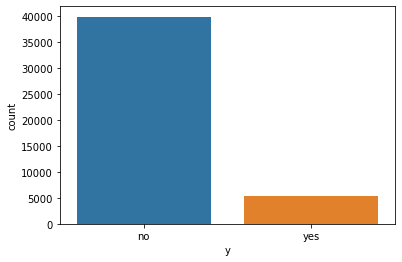

In [43]:
sb.countplot(x="y",data=df)

In [44]:
#From above countplot, we can understand that nearly 40000 clients isn't subscribed a term deposite but, only about 5000 clients have subscribed a term deposite.
#The countplot visualized that data is not balanced, since number of clients of negative (no) category is much more than positive (Yes) category.

<AxesSubplot:xlabel='job', ylabel='count'>

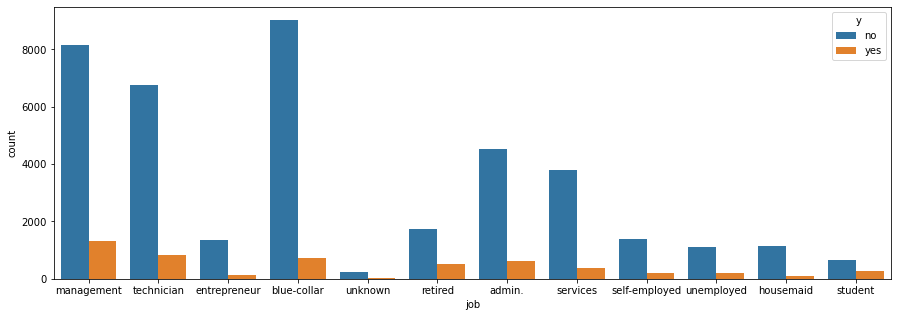

In [45]:
plt.figure(figsize=(15,5))
sb.countplot(x="job",data=df,hue = 'y')

In [46]:
#The count plot visualized that,'Management', 'Technician' and 'Blue-Collar' are top three job profiles who have highest number of clients who have subscribed to term deposite as well as the clients who have not subscribed to term deposite.
#'unknown' job profile has the lowest number of clients subscribed/not subscribed a term deposite.
#The'entrepreneur', 'self-employed', 'unemployed', 'housemaid' ,'unknown' is the job profile which has lowest rate of subscribed/not subscribed a term deposite.

<AxesSubplot:xlabel='marital', ylabel='count'>

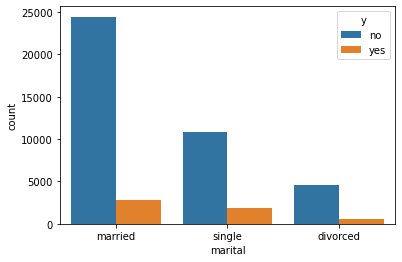

In [47]:
sb.countplot(x="marital",data=df,hue = 'y')

In [48]:
#The countplot visualized that, married clients is the hightest number of clients who have subscribed/not subscribed a term deposite.
#The divorced client has Lowest number of customers who clients\not subscribe a term deposit.

<AxesSubplot:xlabel='education', ylabel='count'>

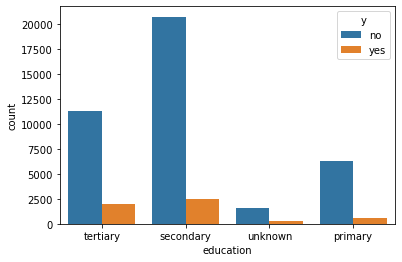

In [49]:
sb.countplot(x="education",data=df,hue = 'y')

In [50]:
#The countplot visualized that, 'secondary' and 'Tertiary' clients has hightest number of clients who have subscribed/not subscribed a term deposite.
#The unknown clients has Lowest number who subscribed\not subscribed a term deposit.

<AxesSubplot:xlabel='default', ylabel='count'>

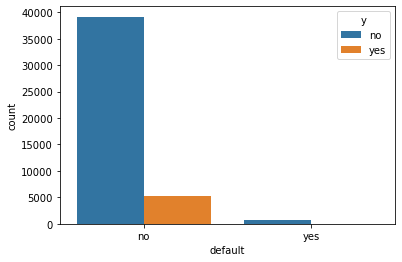

In [51]:
sb.countplot(x="default",data=df,hue = 'y')

<AxesSubplot:xlabel='housing', ylabel='count'>

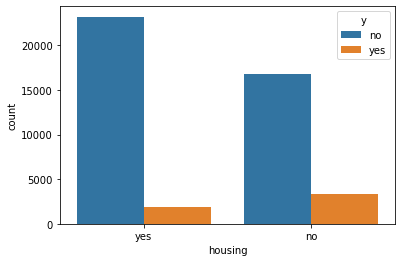

In [52]:
sb.countplot(x="housing",data=df,hue = 'y')

In [53]:
# As we can see, the number of clients subscribed to term deposite who's has no housing.

<AxesSubplot:xlabel='loan', ylabel='count'>

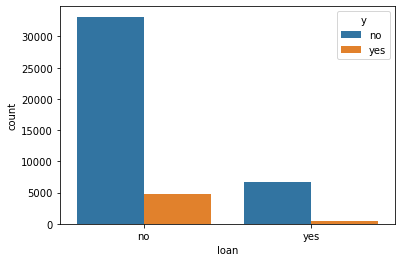

In [54]:
sb.countplot(x="loan",data=df,hue = 'y')

In [55]:
#As we can see, the number of clients who's doesn't have any loan such clients has highest subscribed/not subscribed a term deposite.

<AxesSubplot:xlabel='contact', ylabel='count'>

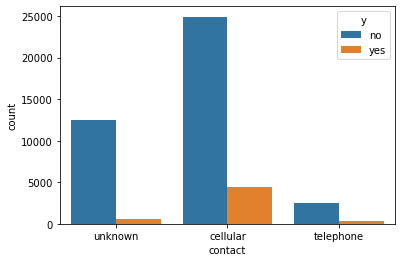

In [56]:
sb.countplot(x="contact",data=df,hue = 'y')

In [57]:
#As we see, the clients which contact through the cellular they are highest subscribe/not subscribed a term deposite.

<AxesSubplot:xlabel='poutcome', ylabel='count'>

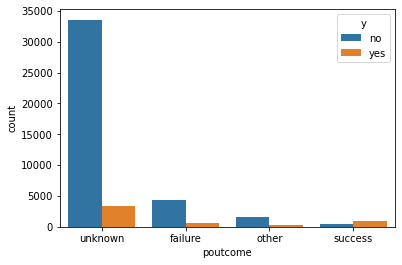

In [58]:
sb.countplot(x="poutcome",data=df,hue = 'y')

In [59]:
# As we can see, the number of clients subscribed/not subscribed a term deposite they are unknown clients of poutcome.

<AxesSubplot:xlabel='y', ylabel='age'>

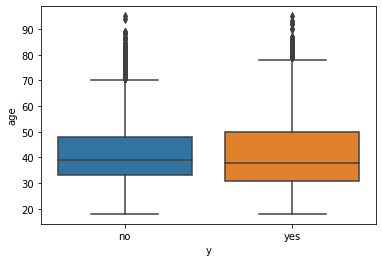

In [60]:
sb.boxplot(x="y",y="age",data=df)

In [61]:
#From this boxplot, we conclude that the clients who have subscribed and not-subscribed has age(median) around 40.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

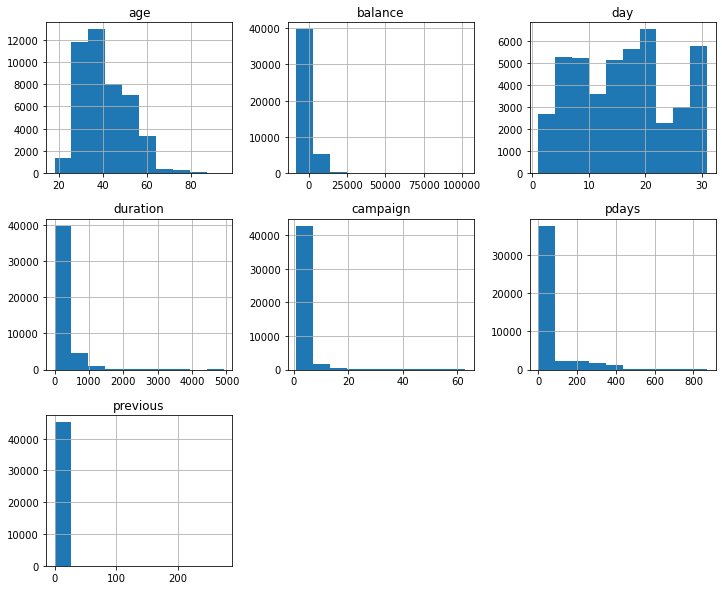

In [62]:
df1.hist(figsize=(12,10))

## Data Preprocessing

In [63]:
#Label Encoding
df1['job'] = df1['job'].cat.codes
df1['marital'] = df1['marital'].cat.codes
df1['education'] = df1['education'].cat.codes
df1['default'] = df1['default'].cat.codes
df1['housing'] = df1['housing'].cat.codes
df1['loan'] = df1['loan'].cat.codes
df1['contact'] = df1['contact'].cat.codes
df1['month'] = df1['month'].cat.codes
df1['poutcome'] = df1['poutcome'].cat.codes
df1['y'] = df1['y'].cat.codes

In [64]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,16]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [66]:
x1 = x.clip(lower=0) # Replacing all negative values of x with 0
x1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0,0,3


## Correlation Matrix and Heatmap

In [70]:
corrmat = df1.corr()
corrmat

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


In [72]:
top_corr_features = corrmat.index

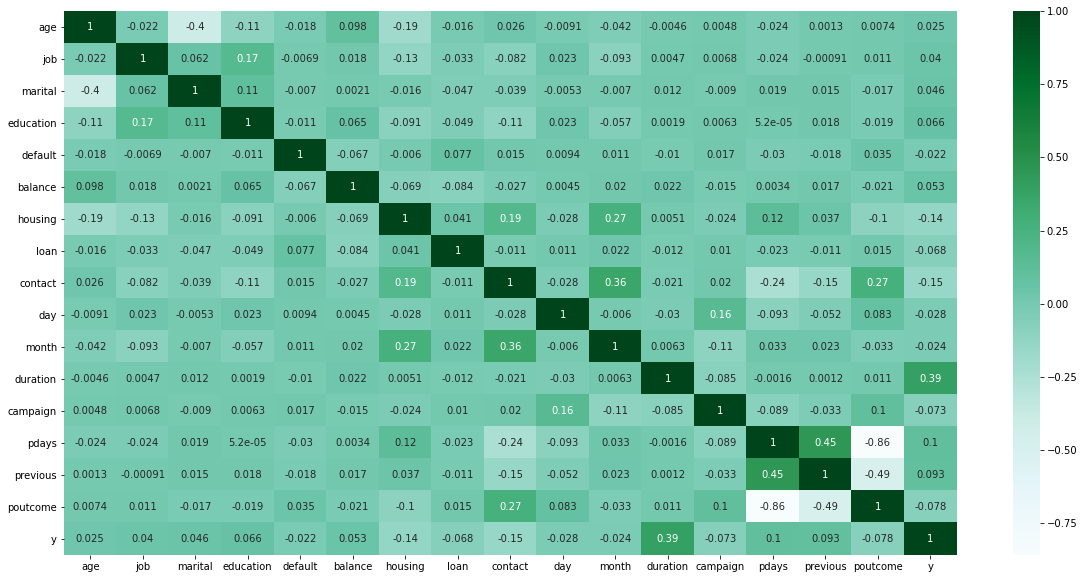

In [78]:
plt.figure(figsize=(20,10))
#plot heat map
g=sb.heatmap(df1[top_corr_features].corr(),annot=True,cmap="BuGn")

## Univariant Selection using SelectKBest

In [79]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [80]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x1,y)

In [82]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x1.columns)

In [83]:
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [84]:
 #naming the dataframe columns 
featureScores.columns = ['parameters','Score']

In [85]:
#print top 10 best features
print(featureScores.nlargest(10,'Score')) 

   parameters         Score
11   duration  1.807711e+06
5     balance  7.884598e+05
13      pdays  1.171871e+05
14   previous  3.593220e+03
8     contact  1.253814e+03
12   campaign  8.405821e+02
6     housing  3.889497e+02
1         job  1.824523e+02
7        loan  1.765161e+02
9         day  1.592004e+02


In [87]:
#this top 10 features is use to find out the best accurancy of our model
bank = x1[['duration', 'balance', 'pdays', 'previous', 'contact', 'campaign', 'housing', 'job', 'loan', 'day']]
bank.head(5)

,duration,balance,pdays,previous,contact,campaign,housing,job,loan,day
0,261,2143,0,0,2,1,1,4,0,5
1,151,29,0,0,2,1,1,9,0,5
2,76,2,0,0,2,1,1,2,1,5
3,92,1506,0,0,2,1,1,1,0,5
4,198,1,0,0,2,1,0,11,0,5


In [88]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int8

In [89]:
bank.describe()

,duration,balance,pdays,previous,contact,campaign,housing,job,loan,day
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,258.163080,1388.734069,41.015195,0.580323,0.640242,2.763841,0.555838,4.339762,0.160226,15.806419
std,257.527812,3029.530442,99.792615,2.303441,0.897951,3.098021,0.496878,3.272657,0.366820,8.322476
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,103.000000,72.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,8.000000
50%,180.000000,448.000000,0.000000,0.000000,0.000000,2.000000,1.000000,4.000000,0.000000,16.000000
75%,319.000000,1428.000000,0.000000,0.000000,2.000000,3.000000,1.000000,7.000000,0.000000,21.000000
max,4918.000000,102127.000000,871.000000,275.000000,2.000000,63.000000,1.000000,11.000000,1.000000,31.000000


In [90]:
bank.corr()

,duration,balance,pdays,previous,contact,campaign,housing,job,loan,day
duration,1.000000,0.021325,-0.001584,0.001203,-0.020839,-0.084570,0.005075,0.004744,-0.012412,-0.030206
balance,0.021325,1.000000,0.002627,0.016018,-0.025614,-0.014164,-0.065279,0.017850,-0.079532,0.005788
pdays,-0.001584,0.002627,1.000000,0.454288,-0.244526,-0.088508,0.124350,-0.024531,-0.022709,-0.093024
previous,0.001203,0.016018,0.454288,1.000000,-0.147811,-0.032855,0.037076,-0.000911,-0.011043,-0.051710
contact,-0.020839,-0.025614,-0.244526,-0.147811,1.000000,0.019614,0.188123,-0.082063,-0.010873,-0.027936
campaign,-0.084570,-0.014164,-0.088508,-0.032855,0.019614,1.000000,-0.023599,0.006839,0.009980,0.162490
housing,0.005075,-0.065279,0.124350,0.037076,0.188123,-0.023599,1.000000,-0.125363,0.041323,-0.027982
job,0.004744,0.017850,-0.024531,-0.000911,-0.082063,0.006839,-0.125363,1.000000,-0.033004,0.022856
loan,-0.012412,-0.079532,-0.022709,-0.011043,-0.010873,0.009980,0.041323,-0.033004,1.000000,0.011370
day,-0.030206,0.005788,-0.093024,-0.051710,-0.027936,0.162490,-0.027982,0.022856,0.011370,1.000000


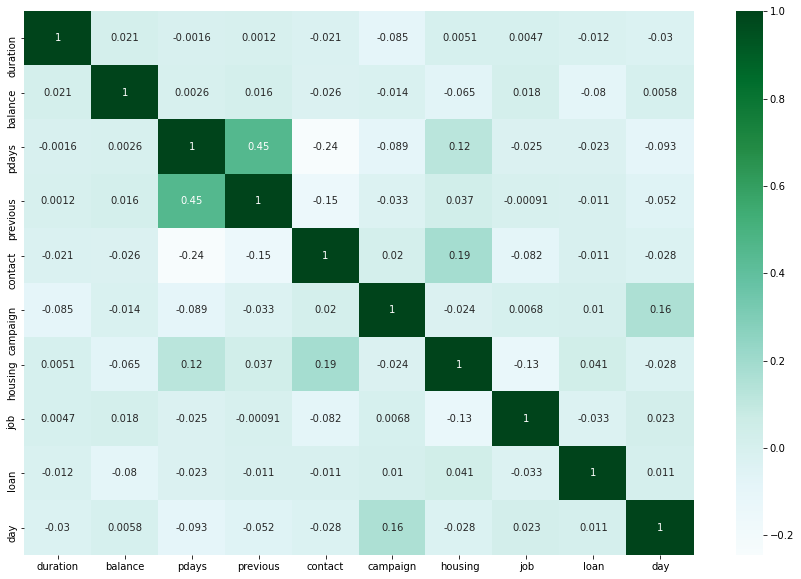

In [91]:
plt.figure(figsize=(15,10))
g1 = sb.heatmap(bank.corr(), annot=True, cmap= 'BuGn')

In [ ]:
#Above heatmap shows the correlation between the significant features.
#We can say that there's is a strong relation between features 'previous' and 'pdays' as compared to other features.
#the relation between features 'contact' and 'pdays' is the weakest among all.

# Model Building

## Model 1
#### Statsmodel - Logit()

In [92]:
model1 = sm.Logit(y, bank).fit()

Optimization terminated successfully.
         Current function value: 0.292027
         Iterations 8


In [93]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45201
Method:                           MLE   Df Model:                            9
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                  0.1908
Time:                        17:09:58   Log-Likelihood:                -13203.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
duration       0.0033   5.71e-05     57.265      0.000       0.003       0.003
balance     -1.06e-05   4.92e-06     -2.154      0.031   -2.03e-05   -9.55e-07
pdays          0.0007      0.000      4.418      0.000       0.000       0.001
previous       0.0633      0.008      7.973      0.000       0.048       0.079
contact       -0.7889      0.025    -32.092      0.000      -0.837      -0.741
campaign      -0.3301      0.011    -28.950      0.000      -0.352      -0.308
housing       -1.4508      0.034    -42.724      0.000      -1.517      -1.384
job           -0.0937      0.005    -20.621      0.000      -0.103      -0.085
loan          -1.0626      0.055    -19.331      0.000      -1.170      -0.955
day           -0.0517      0.002    -30.179      0.000      -0.055      -0.048
==============================================================================
"""

In [94]:
model1.params

duration    0.003271
balance    -0.000011
pdays       0.000733
previous    0.063267
contact    -0.788923
campaign   -0.330111
housing    -1.450791
job        -0.093711
loan       -1.062574
day        -0.051714
dtype: float64

In [95]:
y_pred1 = model1.predict(bank)
y_pred1.head(4)

0    0.040651
1    0.018576
2    0.009769
3    0.031490
dtype: float64

In [96]:
y_pred1 = list(map(round, y_pred1))
y_pred1 = pd.DataFrame(y_pred1)

In [99]:
prediction1 = pd.concat([y,y_pred1], axis = 1)
prediction1

,y,0
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


# Model 2
## Normalizing 'bank'

In [102]:
scalar = MinMaxScaler(feature_range= (0,1))
scalar.fit(bank)
scaled_x = scalar.transform(bank)
scaled_x

array([[5.30703538e-02, 2.09836772e-02, 0.00000000e+00, ...,
        3.63636364e-01, 0.00000000e+00, 1.33333333e-01],
       [3.07035380e-02, 2.83960167e-04, 0.00000000e+00, ...,
        8.18181818e-01, 0.00000000e+00, 1.33333333e-01],
       [1.54534364e-02, 1.95834598e-05, 0.00000000e+00, ...,
        1.81818182e-01, 1.00000000e+00, 1.33333333e-01],
       ...,
       [2.29158194e-01, 5.59597364e-02, 2.11251435e-01, ...,
        4.54545455e-01, 0.00000000e+00, 5.33333333e-01],
       [1.03294022e-01, 6.54087558e-03, 0.00000000e+00, ...,
        9.09090909e-02, 0.00000000e+00, 5.33333333e-01],
       [7.34038227e-02, 2.90912295e-02, 2.15843858e-01, ...,
        1.81818182e-01, 0.00000000e+00, 5.33333333e-01]])

In [103]:
model2 = LogisticRegression()
model2.fit(scaled_x,y)

LogisticRegression()

In [104]:
model2.coef_

array([[17.72273709,  2.00537386,  2.32192876,  3.68882538, -1.16168868,
        -6.09988223, -1.03019879,  0.1610244 , -0.7190179 , -0.16780812]])

In [105]:
proba = model2.predict_proba(scaled_x)
proba

array([[0.97326394, 0.02673606],
       [0.98128176, 0.01871824],
       [0.99364193, 0.00635807],
       ...,
       [0.13320987, 0.86679013],
       [0.82180956, 0.17819044],
       [0.63926829, 0.36073171]])

In [106]:
y_pred2 = model2.predict(scaled_x)
y_pred2

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [107]:
conf_matrix = confusion_matrix(y,y_pred2)
print(conf_matrix)

[[39265   657]
 [ 4303   986]]


In [108]:
pd.crosstab(y,y_pred2)

col_0,0,1
y,,
0,39265,657
1,4303,986


In [109]:
((39265+986)/(39265+986+657+4303))*100

89.02921855300701

In [110]:
#bank.shape[0] : All rows
accuracy = sum(y==y_pred2)/df.shape[0]
accuracy

0.8902921855300702

In [111]:
print( classification_report(y,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.19      0.28      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.58      0.61     45211
weighted avg       0.87      0.89      0.86     45211



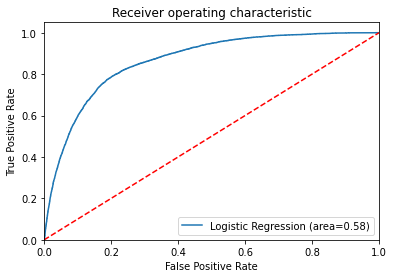

In [113]:
fpr, tpr, thresholds = roc_curve(y,proba[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% roc_score)
plt.plot([0, 1], [0, 1],'r--') # 'r--' : red coloured dash line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [118]:
auc = roc_auc_score(y, y_pred2)
auc

0.584983781808067

In [116]:
fpr

array([0.00000000e+00, 2.50488452e-05, 2.50488452e-05, ...,
       9.88452482e-01, 9.88452482e-01, 1.00000000e+00])

In [117]:
tpr

array([0.00000000e+00, 0.00000000e+00, 1.89071658e-04, ...,
       9.99810928e-01, 1.00000000e+00, 1.00000000e+00])

# Improving Model 2

In [119]:
model2 = LogisticRegression(solver='saga', C=20.0, random_state=1)
model2.fit(scaled_x, y)

LogisticRegression(C=20.0, random_state=1, solver='saga')

In [120]:
new_prob = model2.predict_proba(scaled_x)
new_prob

array([[0.97466396, 0.02533604],
       [0.98294935, 0.01705065],
       [0.99446154, 0.00553846],
       ...,
       [0.1096837 , 0.8903163 ],
       [0.82672132, 0.17327868],
       [0.52685741, 0.47314259]])

In [121]:
y_pred3 = model2.predict(scaled_x)
y_pred3

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [122]:
model2.score(scaled_x, y)

0.8908451483046161

In [124]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.21      0.31      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.59      0.62     45211
weighted avg       0.87      0.89      0.87     45211



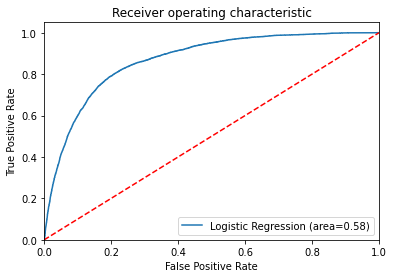

In [129]:
fpr, tpr, thresholds = roc_curve(y,new_prob[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [130]:
auc2 = roc_auc_score(y, y_pred3)
auc2

0.5938260786450008

In [ ]:
#Here, we got an improved model just by setting up parameters for LogisticRegression() model.
#We can see an improved score of 0.890845 and improved auc2 of 0.593826 as compared to model 2.

In [127]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [128]:
fpr

array([0.00000000e+00, 2.50488452e-05, 5.00976905e-05, ...,
       9.93437203e-01, 9.93437203e-01, 1.00000000e+00])

## Standardizing 'xtrain' and 'xtest'

In [131]:
x2 = bank.values
y2 = y.values

In [133]:
# Splitting the data for training and testing
xtrain, xtest, ytrain, ytest = train_test_split(
x2, y2, test_size = 0.20, random_state = 10)


In [134]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [135]:
print(xtrain[0:5,:])

[[-0.30738733 -0.45356646 -0.41189017 -0.24419181 -0.71144243 -0.24894678
   0.89399326  1.42538934 -0.43702462  0.62689417]
 [-0.29571388  0.01207209 -0.41189017 -0.24419181 -0.71144243 -0.57282833
   0.89399326 -1.01971428  2.28820062 -0.93643115]
 [-0.92218909 -0.40758954 -0.41189017 -0.24419181  1.51764318  2.34210565
   0.89399326 -1.01971428  2.28820062 -0.21489639]
 [ 0.43193125 -0.35900401 -0.41189017 -0.24419181  1.51764318 -0.57282833
   0.89399326  0.50847548 -0.43702462  0.50663838]
 [-0.33073423  2.16809592 -0.41189017 -0.24419181 -0.71144243 -0.24894678
   0.89399326 -1.01971428 -0.43702462 -0.33515218]]


In [136]:
print(xtest[0:5,:])

[[ 0.41636665 -0.45356646 -0.41189017 -0.24419181  1.51764318  0.39881633
   0.89399326  1.42538934 -0.43702462  0.50663838]
 [-0.73930502  0.13989443 -0.41189017 -0.24419181  1.51764318 -0.57282833
   0.89399326  0.50847548 -0.43702462  0.50663838]
 [ 2.52147902  0.28108595 -0.41189017 -0.24419181  1.51764318 -0.24894678
   0.89399326 -0.10280042 -0.43702462  0.26612679]
 [-0.25291122  1.97538417 -0.41189017 -0.24419181 -0.71144243 -0.57282833
   0.89399326  1.42538934 -0.43702462 -1.05668694]
 [ 0.69652948 -0.43432789 -0.41189017 -0.24419181  1.51764318 -0.24894678
  -1.11857666 -0.71407633 -0.43702462 -0.33515218]]


## Model Building

In [137]:
model3 = LogisticRegression(C = 10, random_state = 10, solver = 'lbfgs', n_jobs = 10)
model3.fit(xtrain, ytrain)

LogisticRegression(C=10, n_jobs=10, random_state=10)

In [139]:
y_pred4 = model3.predict(xtest)
y_pred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [140]:
# Printing Confusion Matrix
conf_matrix3 = confusion_matrix(ytest,y_pred4)
conf_matrix3

array([[7851,  143],
       [ 836,  213]], dtype=int64)

In [142]:
# probability prediction for target variable
y_prob3 = model3.predict_proba(xtest)
y_prob3

array([[0.97617463, 0.02382537],
       [0.98889506, 0.01110494],
       [0.787309  , 0.212691  ],
       ...,
       [0.95289641, 0.04710359],
       [0.96570544, 0.03429456],
       [0.85684936, 0.14315064]])

## Model Validation

In [143]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred4)

0.8917394669910428

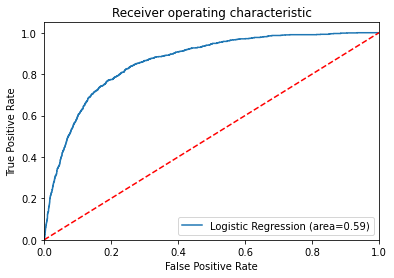

In [144]:
fpr, tpr, thresholds = roc_curve(ytest,y_prob3[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [145]:
auc3 = roc_auc_score(ytest, y_pred4)
auc3

0.5925810539983157

In [147]:
print(classification_report(ytest,y_pred4))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7994
           1       0.60      0.20      0.30      1049

    accuracy                           0.89      9043
   macro avg       0.75      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043



In [148]:
fpr

array([0.00000000e+00, 1.25093820e-04, 1.25093820e-04, ...,
       9.34575932e-01, 9.34575932e-01, 1.00000000e+00])

In [149]:
tpr

array([0.        , 0.        , 0.00381316, ..., 0.99904671, 1.        ,
       1.        ])